# Trabalho 2 - Inteligência Computacional

## Importações utilizadas:
* arff               -Leitura do DataSet
* panda              -Criação do DataFrame
* numpy              -Operações com números
* tree               -Criação da árvore de Decisões
* svm                -Criação da máquina de suporte a vetores
* train_test_split   -Separação de amostras de teste e treinamento
* accuracy_score     -Obtenção da acurácia
* time               -Tempo para comparações
* display            -Gráficos
* pl                 -Plotar os dados
* mpatche            -Auxiliar para medidas

In [1]:
from scipy.io import arff
import pandas as pd
import numpy as np
import sklearn.tree as tree
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from time import time
from IPython.display import display
import matplotlib.pyplot as pl
import matplotlib.patches as mpatches

## Carregando os dados
Obtendo dataSet do arquivo .arff

In [2]:
data = arff.loadarff('Autism-Adult-Data.arff')
df = pd.DataFrame(data[0], dtype=np.str)

## Formatando
* Cria um dicionário de dados para transformar strings em numeros
* Retira dos dados aqueles registros que possuem colunas faltantes
* Deleta colunas não utilizadas
* Formata as strings para float

In [3]:
replace_map = { 'gender': {
                    'f' : 1,
                    'm' : 0
                }, 
                'jundice': {
                    'yes': 1,
                    'no': 0
                }, 
                'austim': {
                    'yes': 1,
                    'no': 0
                },
                'used_app_before': {
                    'yes': 1,
                    'no': 0
                },
                'Class/ASD' : {
                    'YES': 1,
                    'NO': 0
                }
              }

df.replace(replace_map, inplace=True)

df = df[df != '?']

df.dropna(axis = 0, inplace = True)

y = df['Class/ASD']

df.drop(['age_desc', 'Class/ASD', 'result', 'contry_of_res', 'ethnicity', 'relation'], axis=1, inplace=True)

df = df.astype(np.float)

## Separação dos dados

* Depende dos parâmetros, nesse caso se utiliza 20% dos dados para teste selecionados de maneira randômica
* Quantidade de registros para treinamento
* Quantidade de registros para teste

In [4]:
X_train, X_test, y_train, y_test = train_test_split(df, y, test_size=0.2, random_state=50)

print ("Treinamento:", len(X_train))
print ("Teste:", len(y_test))
print ("Total:", len(X_train) + len(y_test), "registros")

Treinamento: 487
Teste: 122
Total: 609 registros


# Decision Tree
* Matriz de Confusão
* Tempo de Treinamento
* Acurácia total

In [27]:
clfDecisionTree = tree.DecisionTreeClassifier(random_state=50)

start = time()
clfDecisionTree.fit(X_train, y_train)
end = time()

prediction = clfDecisionTree.predict(X_test)

tree.export_graphviz(clfDecisionTree, out_file='treeFinal.dot') 

print (pd.crosstab(y_test, prediction, rownames=['Autista'], colnames=['Predição'], margins=True))

print ("Tempo Total de Treinamento:", end - start, "segundos")

print ("Acurácia total: ", accuracy_score(y_test, prediction))

Predição   0   1  All
Autista              
0         68   7   75
1          9  38   47
All       77  45  122
Tempo Total de Treinamento: 0.0029990673065185547 segundos
Acurácia total:  0.8688524590163934


# Support Vector Machine
* Matriz de Confusão
* Tempo de Treinamento
* Acurácia total

In [6]:
clfSVM = svm.SVC(random_state=50, gamma='auto')

start = time()
clfSVM.fit(X_train, y_train)
end = time()

clf_prediction = clfSVM.predict(X_test)

print (pd.crosstab(y_test, clf_prediction, rownames=['Autista'], colnames=['Predição'], margins=True))

print ("Tempo Total de Treinamento:", end - start, "segundos")

print ("Acurácia total:", accuracy_score(y_test, clf_prediction))

Predição   0   1  All
Autista              
0         73   2   75
1          9  38   47
All       82  40  122
Tempo Total de Treinamento: 0.02401256561279297 segundos
Acurácia total: 0.9098360655737705


### Cria a função para popular as tabelas e criar Grafícos

In [31]:
from sklearn.metrics import fbeta_score, accuracy_score

def train_predict(learner, sample_size, X_train, y_train, X_test, y_test): 
    '''
    inputs:
       - learner: the learning algorithm to be trained and predicted on
       - sample_size: the size of samples (number) to be drawn from training set
       - X_train: features training set
       - y_train: income training set
       - X_test: features testing set
       - y_test: income testing set
    '''
    
    results = {}
    
    start = time() 
    learner = learner.fit(X_train[:sample_size], y_train[:sample_size])
    end = time() 
    
    results['train_time'] = end - start
        
    start = time() 
    predictions_test = learner.predict(X_test)
    predictions_train = learner.predict(X_train)
    end = time()
    
    results['pred_time'] = end - start
    
    results['acc_train'] = accuracy_score(y_train, predictions_train)
        
    results['acc_test'] = accuracy_score(y_test, predictions_test)
    
    results['f_train'] = fbeta_score(y_train, predictions_train, beta=0.5)
        
    results['f_test'] = fbeta_score(y_test, predictions_test, beta=0.5)
       
    print("{} trained on {} samples.".format(learner.__class__.__name__, sample_size))
        
    return results



def evaluate(results):
    """
    Visualization code to display results of various learners.
    
    inputs:
      - learners: a list of supervised learners
      - stats: a list of dictionaries of the statistic results from 'train_predict()'
    """
  
    # Create figure
    fig, ax = pl.subplots(2, 3, figsize = (25,20))

    # Constants
    bar_width = 0.35
    colors = ['#A00000','#00A0A0','#00A000']
    
    # Super loop to plot four panels of data
    for k, learner in enumerate(results.keys()):
        for j, metric in enumerate(['train_time', 'acc_train', 'f_train', 'pred_time', 'acc_test', 'f_test']):
            for i in np.arange(3):
                
                # Creative plot code
                ax[j//3, j%3].bar(i+k*bar_width, results[learner][i][metric], width = bar_width, color = colors[k])
                ax[j//3, j%3].set_xticks([0.45, 1.45, 2.45])
                ax[j//3, j%3].set_xticklabels(["1%", "10%", "100%"])
                ax[j//3, j%3].set_xlabel("Training Set Size")
                ax[j//3, j%3].set_xlim((-0.1, 3.0))
    
    # Add unique y-labels
    ax[0, 0].set_ylabel("Time (in seconds)")
    ax[0, 1].set_ylabel("Accuracy Score")
    ax[0, 2].set_ylabel("F-score")
    ax[1, 0].set_ylabel("Time (in seconds)")
    ax[1, 1].set_ylabel("Accuracy Score")
    ax[1, 2].set_ylabel("F-score")
    
    # Add titles
    ax[0, 0].set_title("Model Training")
    ax[0, 1].set_title("Accuracy Score on Training Subset")
    ax[0, 2].set_title("F-score on Training Subset")
    ax[1, 0].set_title("Model Predicting")
    ax[1, 1].set_title("Accuracy Score on Testing Set")
    ax[1, 2].set_title("F-score on Testing Set")
    
    
    # Set y-limits for score panels
    ax[0, 1].set_ylim((0, 1))
    ax[0, 2].set_ylim((0, 1))
    ax[1, 1].set_ylim((0, 1))
    ax[1, 2].set_ylim((0, 1))

    # Create patches for the legend
    patches = []
    for i, learner in enumerate(results.keys()):
        patches.append(mpatches.Patch(color = colors[i], label = learner))
    pl.legend(handles = patches, bbox_to_anchor = (-.80, 2.53), \
               loc = 'upper center', borderaxespad = 0., ncol = 3, fontsize = 'x-large')
    
    # Aesthetics
    pl.suptitle("Métricas de Performance para os dois modelos de aprendizado supervisionado", fontsize = 16, y = 1.10)
    pl.tight_layout()
    pl.show()

### Comparações Entre os Classificadores
* Treinamentos com 1, 10 e 100 % dos dois classificadores
* Representação dos resultados com tabelas
* Representação dos resultados em gráficos

DecisionTreeClassifier trained on 4 samples.
DecisionTreeClassifier trained on 48 samples.
DecisionTreeClassifier trained on 487 samples.
SVC trained on 4 samples.
SVC trained on 48 samples.
SVC trained on 487 samples.
DecisionTreeClassifier


,1% of train,10% of train,100% of train
acc_test,0.663934,0.803279,0.868852
acc_train,0.716632,0.854209,1.000000
f_test,0.583090,0.748899,0.837004
f_train,0.538462,0.716096,1.000000
pred_time,0.002999,0.001000,0.001999
train_time,0.005994,0.002997,0.002998


SVC


,1% of train,10% of train,100% of train
acc_test,0.631148,0.598361,0.909836
acc_train,0.741273,0.733060,0.987680
f_test,0.238095,0.079365,0.917874
f_train,0.298507,0.263158,0.981735
pred_time,0.001999,0.003003,0.004997
train_time,0.002998,0.002998,0.007992


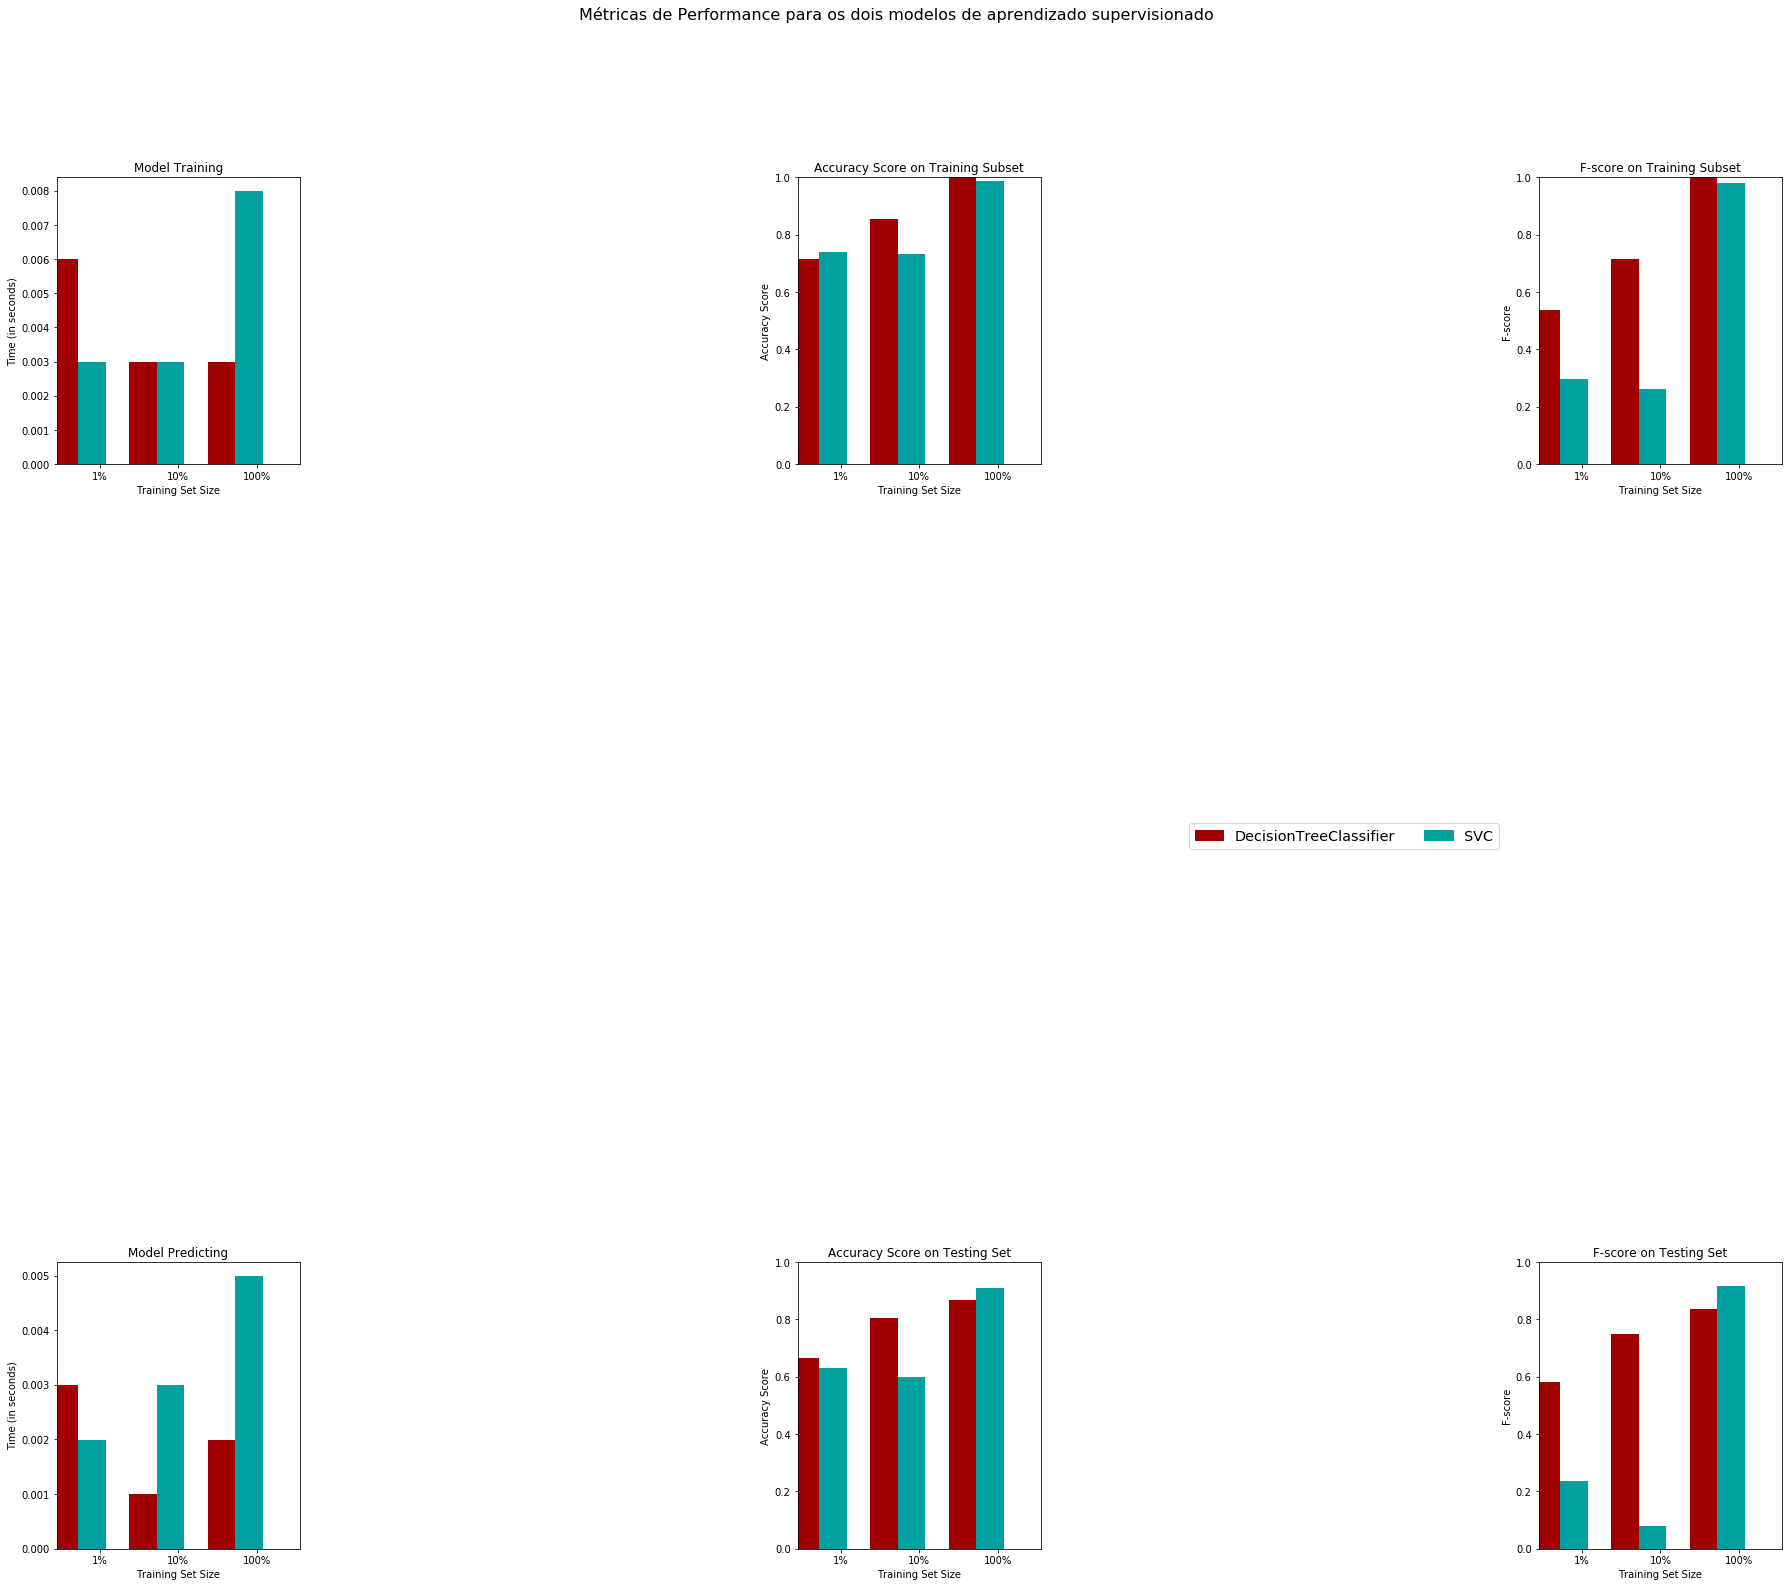

In [32]:
samples_100 = len(y_train)
samples_10 = int(len(y_train)/10)
samples_1 = int(len(y_train)/100)

clf_A = tree.DecisionTreeClassifier(random_state=50)
clf_B = svm.SVC(random_state=50, gamma='auto')

# Collect results on the learners
results = {}
for clf in [clf_A, clf_B]:
    clf_name = clf.__class__.__name__
    results[clf_name] = {}
    for i, samples in enumerate([samples_1, samples_10, samples_100]):
        results[clf_name][i] = \
        train_predict(clf, samples, X_train, y_train, X_test, y_test)
        
for i in results.items():
  print(i[0])
  display(pd.DataFrame(i[1]).rename(columns={0:'1% of train', 1:'10% of train', 2:'100% of train'}))

evaluate(results)